# Monte Carlo

### Inverse Transform Sampling

Con variales aleatorias de una uniforme con valores entre 0 y 1, lo ponemos en la inversa CDF de X para generar raiables aleatores de X

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image

#Funcion que genera n rv exponenciales con un rate especifico

def exponentiaRVs(rate, n):
    #lista vacia con las rv
    exponential_RVs = []
    #iterar ente 0 y n-1 para generar las rv exponenciales y devolvemos la lista de rv
    for i in range(n):
        #definicion de la inversa de la exponencial. np.random.uniform nos da psuedo numeros aleatorios 
        #uniformes entre 0 y 1 
        exponential_RV = -(1/rate)* np.log(1- np.random.uniform(0,1))
        exponential_RVs.append(exponential_RV)
    return (exponential_RVs)

(array([1.01e+03, 8.60e+02, 7.67e+02, 6.92e+02, 6.43e+02, 5.91e+02,
        5.30e+02, 4.67e+02, 4.14e+02, 3.78e+02, 3.43e+02, 3.29e+02,
        3.06e+02, 2.55e+02, 2.20e+02, 2.24e+02, 1.67e+02, 1.59e+02,
        1.58e+02, 1.23e+02, 1.46e+02, 1.35e+02, 9.00e+01, 1.04e+02,
        9.80e+01, 7.40e+01, 7.00e+01, 5.80e+01, 5.10e+01, 4.90e+01,
        4.30e+01, 4.00e+01, 4.40e+01, 2.50e+01, 4.20e+01, 2.90e+01,
        1.90e+01, 2.50e+01, 2.30e+01, 2.10e+01, 1.70e+01, 1.60e+01,
        1.00e+01, 1.20e+01, 1.40e+01, 9.00e+00, 8.00e+00, 1.30e+01,
        7.00e+00, 9.00e+00, 8.00e+00, 7.00e+00, 1.00e+00, 3.00e+00,
        5.00e+00, 4.00e+00, 3.00e+00, 2.00e+00, 3.00e+00, 4.00e+00,
        3.00e+00, 0.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 1.00e+00,
        1.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00]),
 array([

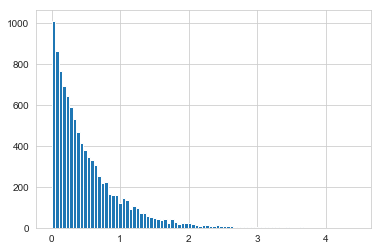

In [74]:
a =exponentiaRVs(2, 10000)
plt.hist(a, bins = 'auto')

In [27]:
# Funcion que genera n rv Chi Cuadrado
def gen_std_norm_sq_RVs(n):
    std_norm_sq_RVs = []
    #iteramos sobre la cantidad de simulaciones que proponemos como parametro
    for i in range(n):
        #Creamos realizacion de distribucion normal standard (al cuadrado) con la inversa CDF y
        # pseudo-random Uniform(0,1) 
        #norm.ppf es la inversa de CDF
        std_norm_sq_RV = stats.norm.ppf(np.random.uniform(0,1)) ** 2
        #apendeamos y devolvemos la lista de rv
        std_norm_sq_RVs.append(std_norm_sq_RV)
    return (std_norm_sq_RVs)

#entonces elevando al cuadrado la inversa de una normal standard vamos a obtener una aproximacion de Chi-Cuadrado
#con parametro k=1

(array([371., 134., 100.,  59.,  63.,  47.,  37.,  29.,  23.,  25.,  13.,
         16.,   9.,   8.,   8.,   9.,   5.,   6.,   4.,   4.,   3.,   6.,
          5.,   2.,   1.,   1.,   0.,   2.,   1.,   1.,   1.,   2.,   2.,
          0.,   1.,   1.,   1.]),
 array([9.10375178e-08, 2.35883550e-01, 4.71767010e-01, 7.07650469e-01,
        9.43533929e-01, 1.17941739e+00, 1.41530085e+00, 1.65118431e+00,
        1.88706777e+00, 2.12295123e+00, 2.35883468e+00, 2.59471814e+00,
        2.83060160e+00, 3.06648506e+00, 3.30236852e+00, 3.53825198e+00,
        3.77413544e+00, 4.01001890e+00, 4.24590236e+00, 4.48178582e+00,
        4.71766928e+00, 4.95355274e+00, 5.18943620e+00, 5.42531966e+00,
        5.66120312e+00, 5.89708658e+00, 6.13297003e+00, 6.36885349e+00,
        6.60473695e+00, 6.84062041e+00, 7.07650387e+00, 7.31238733e+00,
        7.54827079e+00, 7.78415425e+00, 8.02003771e+00, 8.25592117e+00,
        8.49180463e+00, 8.72768809e+00]),
 <a list of 37 Patch objects>)

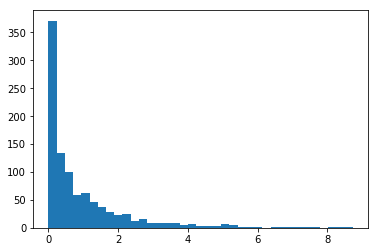

In [26]:
b = gen_std_norm_sq_RVs(1000)
plt.hist(b, bins = 'auto')

In [2]:
#Funcion que genera una RV "inventada". 
# A = X + Y + Z
#X es una Chi cuadrado(1)
#Y es una exponencial con parametro 1/2
#Z es una normal standard

def gen_special_RVs(n):
    special_RVs = []
    for i in range(n):
        special_RV = (stats.norm.ppf(np.random.uniform(0,1))**2 + 
                     stats.expon.ppf(np.random.uniform(0,1), scale = 0.5) +
                     stats.norm.ppf(np.random.uniform(0,1)))
        special_RVs.append(special_RV)
    return(special_RVs)

In [3]:
c = gen_special_RVs(10000)
plt.hist(c, bins = 'auto')

NameError: name 'stats' is not defined

Probability of positive returns after 5 periods:  0.865


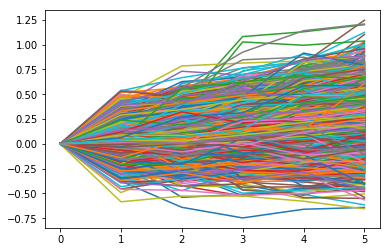

In [36]:
#vamos a usar la distribucion de Laplace para calcular los retornos de un instrumento financerio(ej. stocks, bonds)
#http://businessforecastblog.com/the-laplace-distribution-and-financial-returns/

#Los retornos del siguiente periodo no dependen de los retornos del periodo actual (ej. random walk)
#https://thebusinessprofessor.com/lesson/random-walk-theory-stock-market-explained/

#Cual es la probabilidad de que el retorno de la inversion al periodo 5 sea positiva?

#numero de universos hipoteticos
num_sims = 5000
#numero de periodos para cada univeso
num_periods = 5
final_returns = []

for sim_num in range(num_sims):
    time = [0]
    returns = [0]
    for period in range(1, num_periods +1):
        time.append(period)
        returns.append(returns[period -1] + stats.laplace.rvs(loc = 0.05, scale = 0.07, size = 1))
        
    final_returns.append(float(returns[num_periods - 1]))
    plt.plot(time, returns)
    
positive_returns = []
for i in final_returns:
    if i > 0:
        positive_returns.append(i)

print("Probability of positive returns after 5 periods: ", len(positive_returns)/num_sims)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   2.,   4.,   7.,   5.,   8.,   9.,  10.,  18.,
         18.,  42.,  44.,  51.,  74.,  73., 120., 128., 143., 200., 209.,
        240., 279., 290., 309., 280., 313., 336., 291., 243., 219., 195.,
        169., 134., 113.,  85.,  86.,  70.,  51.,  32.,  31.,  17.,  14.,
          9.,   7.,   6.,   8.,   4.,   0.,   1.,   0.,   0.,   1.]),
 array([-0.90619105, -0.87684689, -0.84750273, -0.81815858, -0.78881442,
        -0.75947027, -0.73012611, -0.70078195, -0.6714378 , -0.64209364,
        -0.61274948, -0.58340533, -0.55406117, -0.52471701, -0.49537286,
        -0.4660287 , -0.43668454, -0.40734039, -0.37799623, -0.34865208,
        -0.31930792, -0.28996376, -0.26061961, -0.23127545, -0.20193129,
        -0.17258714, -0.14324298, -0.11389882, -0.08455467, -0.05521051,
        -0.02586635,  0.0034778 ,  0.03282196,  0.06216611,  0.09151027,
         0.12085443,  0.15019858,  0.17954274,  0

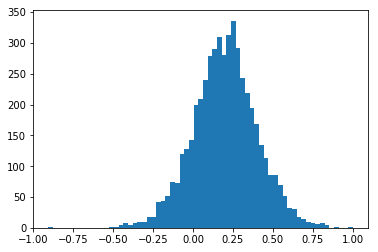

In [19]:
plt.hist(final_returns, bins = 'auto')

## MonteCarlo Integration

Montecarlo tambien puede ser usado para aproximar numericamente una integra definida que es dificil (o imposible) de simular analiticamente. 

Se toman realizaciones de rv Uniforme(a,b) donde a es la cota inferior de la integral y b es la cota superior de la integral. 

Luego los resultados son promediados y multiplicados por (b-a) para obtener una aproximacion de la integral ente a y b.

Supongamos la siguiente integral:

f(x) = cos(2* pi* x**2)

In [40]:
#Corremos 10000 simulacion para dar una aproximacion de la integral 
def monte_carlo_integration(n, a, b, my_function):
    u = np.random.uniform(low= a, high= b, size = n)
    rvs = my_function(u)
    expected_value = (b - a) * np.average(rvs)
    return(expected_value)

def func(x):
    y = np.cos(2 * np.pi * (x**2))
    return (y)

monte_carlo_integration(10000, a = 0, b = 1, my_function = func)

0.24272826688667914

## MonteCarlo Simulation for Sales commissions estimation

In [45]:
#ejemplo obtenido de(https://github.com/chris1610/pbpython/blob/master/notebooks/Monte_Carlo_Simulation.ipynb)
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Vamos a hacer un presupuesto de comisiones de ventas para el proximo año.

La idea basica es no caer en estimar todo con las medias simples como se suele hacer en estos casos 
(https://hbr.org/2002/11/the-flaw-of-averages)

Como vendimos y pagamos comisiones durante varios años podemos obtener la historia y obtener la distrbucion historia del porcentaje del objetivo.

Segun la imagen de abajo podemos aproximar esto a una normal con media 100% y desvio standard 10%

![Image of Yaktocat](https://pbpython.com/images/monte_carlo_image_hist_pct.png)

In [64]:
#Definimos el modelo segun el grafico anterior
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

#generamos nuestra distribucion normal con los anteiores parametros (hasta dos decimales)
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

Ahora debemos obtener tambien nuestra distribucion del objetivo de ventas. Para eso miramos en nuestra historia y obtener la siguiente distribucion 


![Image of Yaktocat](https://pbpython.com/images/monte_carlo_sales_target.png)

El grafico nos dice que los target son seteados en buckets donde seguramente cada vendedor cae en alguno de los buckets y a medida que el target es mayor la frecuencia es menor. 

Entonces a modo de ejemplo vamos a elegir los valores de forma aleatoria uniforme con menor probabilidad a los valores de target grandes (podria aplicarse una poisson tambien)

In [65]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

Entonces teniendo las dos distribuciones  podemos crear una tabla con nuestras tres variables

In [66]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df.head(10)

,Pct_To_Target,Sales_Target,Sales
0,1.00,400000,400000.0
1,0.94,75000,70500.0
2,1.01,300000,303000.0
3,0.92,75000,69000.0
4,1.09,75000,81750.0
5,1.10,100000,110000.0
6,1.15,100000,115000.0
7,0.96,400000,384000.0
8,1.03,75000,77250.0
9,1.16,200000,232000.0


In [67]:
# ahora vamos a calcular el % de comision basado en el cumplimiento del target de ventas
def calc_commission_rate(x):
    """ Comisiones de ventas en base a el % de cumplimiento del target:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [68]:
#Expandimos nuestra tabla e incluimos los valores de comision
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head(10)

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.00,400000,400000.0,0.04,16000.0
1,0.94,75000,70500.0,0.03,2115.0
2,1.01,300000,303000.0,0.04,12120.0
3,0.92,75000,69000.0,0.03,2070.0
4,1.09,75000,81750.0,0.04,3270.0
5,1.10,100000,110000.0,0.04,4400.0
6,1.15,100000,115000.0,0.04,4600.0
7,0.96,400000,384000.0,0.03,11520.0
8,1.03,75000,77250.0,0.04,3090.0
9,1.16,200000,232000.0,0.04,9280.0


Ahora vamos a correr la simulacion en loop para la cantidad anterior de datapoints

In [69]:
# Definimos una lista para ir guardando todos los resultados
all_stats = []


for i in range(num_simulations):

    # Elegimos los random input para targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Armamos un dataset con todos los puntos (num_reps) que recibimos de inputs
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Calculamos las ventas como hicimos anteriormente
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determinamos las comisiones
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # Ordenamos todas las variables en la misma tabla
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])
    
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,621,324.25","2,855,028.973","83,616,425.0"
std,"2,594,927.118181367","98,836.78235898486","2,557,077.82270434"
min,"75,493,250.0","2,553,360.0","75,750,000.0"
25%,"81,869,937.5","2,791,432.0","81,850,000.0"
50%,"83,553,125.0","2,853,215.0","83,525,000.0"
75%,"85,349,687.5","2,918,598.25","85,350,000.0"
max,"91,146,500.0","3,167,012.0","91,350,000.0"


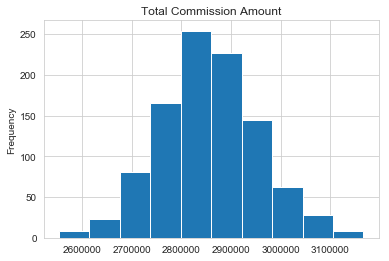

In [72]:
#Grafico del resultado de la simulacion en comisiones
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

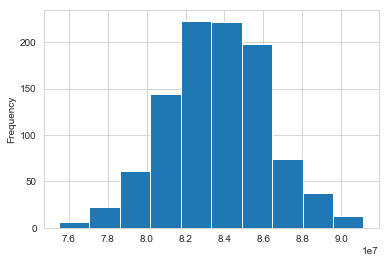

In [71]:
#Grafico del resultado de la simulacion en ventas
results_df['Sales'].plot(kind='hist')